In [1]:
import pandas as pd
df = pd.read_csv("titanic_prepared_data.csv")
df.head()
# df["Survived"].value_counts()

,Survived,Sex,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,FamilySize
0,0,1,22.0,7.2500,0,0,1,0,0,1,2
1,1,0,38.0,71.2833,1,0,0,1,0,0,2
2,1,0,26.0,7.9250,0,0,1,0,0,1,1
3,1,0,35.0,53.1000,1,0,0,0,0,1,2
4,0,1,35.0,8.0500,0,0,1,0,0,1,1


In [2]:
x = df.iloc[:,1:].values
y = df.iloc[:,0].values

In [3]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=0)
# x_train.shape, y_train.shape

In [4]:
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(C=0.08)
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
acc_log_reg = round(accuracy_score(y_pred,y_test)*100, 2)
print str(acc_log_reg)

81.36


In [5]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=7)
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
acc_knn = round(accuracy_score(y_pred,y_test)*100,2)
print str(acc_knn)

70.51


In [6]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB(priors=[0.6,0.4])
# clf = GaussianNB()
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
acc_gnb = round(accuracy_score(y_pred,y_test)*100,2)
print str(acc_gnb)

78.64


In [7]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
acc_tree = round(accuracy_score(y_pred,y_test)*100,2)
print str(acc_tree)

74.24


In [8]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
acc_random_forest = round(accuracy_score(y_pred,y_test)*100,2)
print str(acc_random_forest)

81.69


In [9]:
if acc_random_forest > acc_log_reg :
    print ("Random Forest give higher accuracy on given data set i.e. "+ str(acc_random_forest))
else:
    print ("Logistic Regresion give higher accuracy on given data set i.e."+str(acc_log_reg))

Random Forest give higher accuracy on given data set i.e. 81.69


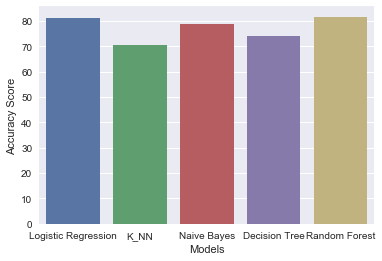

In [10]:
df_plot = pd.DataFrame({'Models':['Logistic Regression','K_NN','Naive Bayes','Decision Tree','Random Forest'],
                        'Accuracy Score':[acc_log_reg,acc_knn,acc_gnb,acc_tree,acc_random_forest]})
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
sns.barplot(x='Models',y='Accuracy Score',data=df_plot)